# Assignment 4

**Roll Number**: 2022101044

**Name** Gajawada Bharath

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

## Task 1: Image Segmentation Using Thresholding

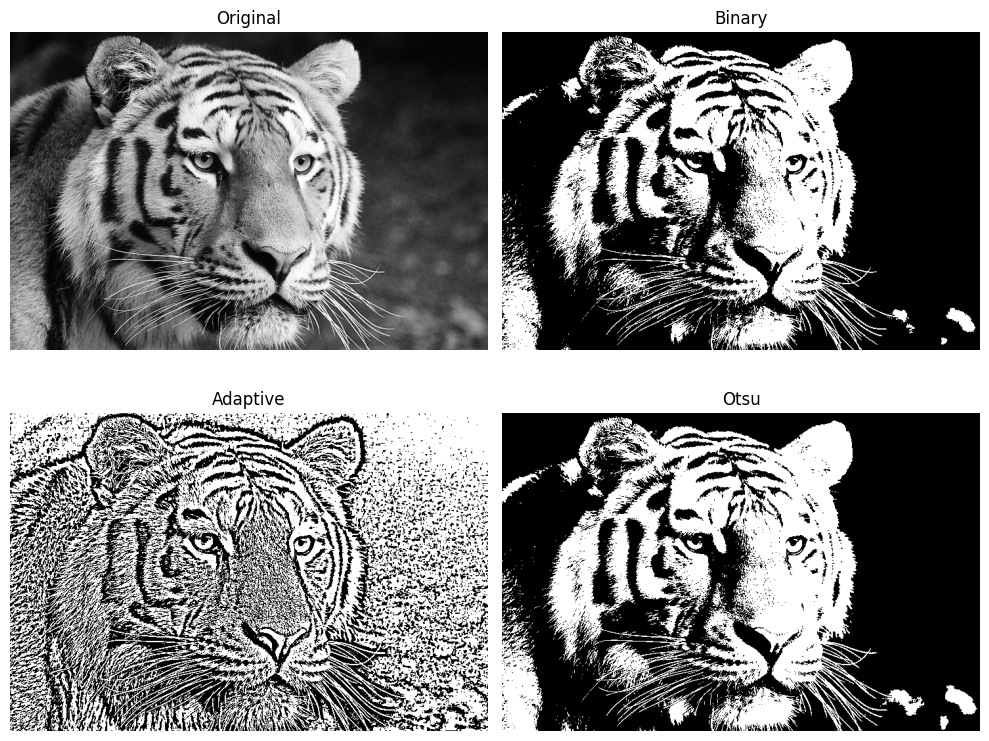

In [2]:
# Load the image in grayscale
tiger = cv2.imread('../images/tiger.jpg', cv2.IMREAD_GRAYSCALE)

# Apply thresholding
_, tiger_binary = cv2.threshold(tiger, 127, 255, cv2.THRESH_BINARY)
tiger_adaptive = cv2.adaptiveThreshold(tiger, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 2)
_, tiger_otzu = cv2.threshold(tiger, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Display the images
titles = ['Original', 'Binary', 'Adaptive', 'Otsu']
images = [tiger, tiger_binary, tiger_adaptive, tiger_otzu]

plt.figure(figsize=(10, 8))
for i in range(4):
    plt.subplot(2, 2, i + 1)
    plt.imshow(images[i], cmap='gray')
    plt.title(titles[i])
    plt.axis('off')
plt.tight_layout()
plt.show()

**Otsu's Thresholding** and **Binary Thresholding** performed similarly and better than Adaptive Thresholding. Both methods provided clearer images with better object boundaries, although some details were lost, especially in areas with uneven lighting. **Adaptive Thresholding**, while preserving some details, introduced a lot of noise, making it harder to clearly detect boundaries.

- **Adaptive Thresholding** calculates different thresholds for small regions of the image, helping with uneven lighting but leading to more noise and weaker boundary detection.

- **Otsu's Thresholding** calculates a global threshold based on the image's histogram. It works well for high-contrast images but can cause some details to be lost, especially in areas with uneven lighting.

- **Binary Thresholding** uses a single threshold for the entire image. It works well when there’s a clear contrast between the object and background, producing clear boundaries, but some details may be lost in low-contrast areas.


## Task 2: Line Detection Using Hough Transform

In [ ]:
def line_detection(image, threshold):
    # Detect edges
    edges = cv2.Canny(image, 50, 150)

    # Detect points that form lines
    lines = cv2.HoughLines(edges, 1, np.pi / 180, threshold)

    # Draw lines on the image
    for line in lines:
        rho, theta = line[0]
        a = np.cos(theta)
        b = np.sin(theta)
        x0 = a * rho
        y0 = b * rho
        x1 = int(x0 + 1000 * (-b))
        y1 = int(y0 + 1000 * (a))
        x2 = int(x0 - 1000 * (-b))
        y2 = int(y0 - 1000 * (a))
        cv2.line(image, (x1, y1), (x2, y2), (0, 0, 255), 2) 

    return image

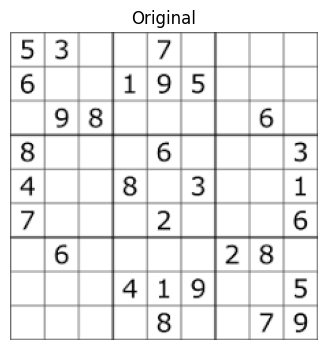

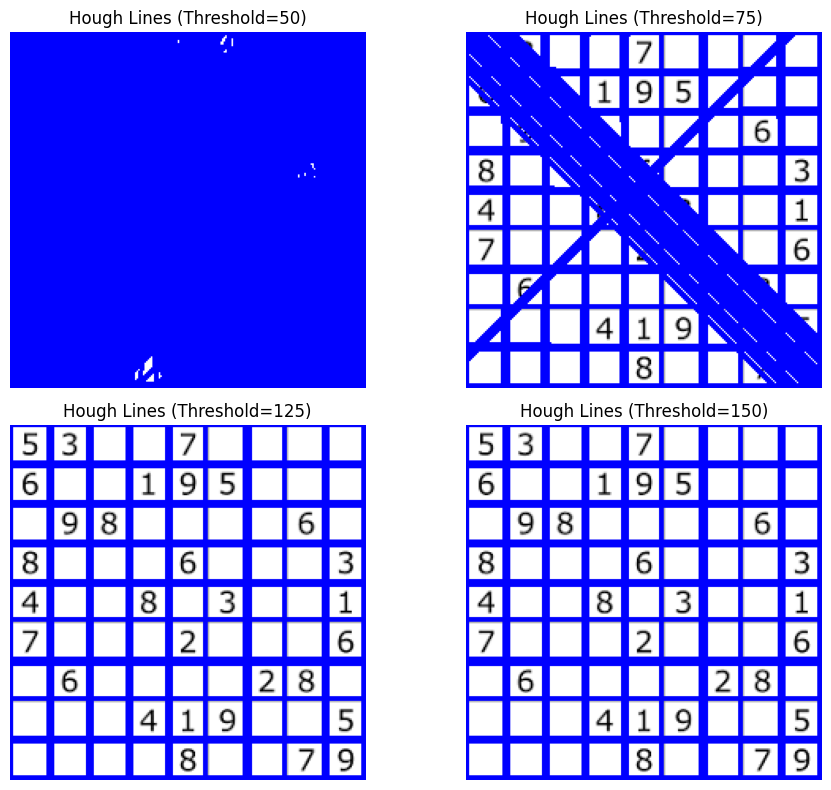

In [ ]:
# Load the image
sudoku = cv2.imread('../images/sudoku.png')
sudoku = cv2.cvtColor(sudoku, cv2.COLOR_BGR2RGB)

# Display the orignal image
plt.figure(figsize=(5, 4))
plt.imshow(sudoku, cmap='gray')
plt.title('Original')
plt.axis('off')
plt.show()


threshold = [50, 75, 125, 150]

# Display the orignal image
plt.figure(figsize=(10, 8))

for i in range(4):
    # Apply Hough Line Transform
    sudoku_lines = line_detection(sudoku.copy(), threshold[i])
    # Display the images with Hough Lines
    plt.subplot(2, 2, i + 1)
    plt.imshow(sudoku_lines, cmap='gray')
    plt.title(f'Hough Lines (Threshold={threshold[i]})')
    plt.axis('off')

plt.tight_layout()
plt.show()

As we can see, with a smaller threshold, the detector picks up too many unnecessary lines, which includes noise. When the threshold is set to correct value, it detects the main lines clearly. Increasing the threshold too much can cause the detector to miss some finer lines.

## Task 3: Circle Detection Using Hough Circle Transform

In [119]:
def circle_detection(image, method, dp, minDist, param1, param2, minRadius, maxRadius):

    # Convert the image to grayscale for processing
    gray_image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

    # Apply Hough Circle Transform
    circles = cv2.HoughCircles(
        gray_image,
        method,                 # Detection method (e.g., cv2.HOUGH_GRADIENT)
        dp,                     # Inverse ratio of the accumulator resolution to the image resolution
        minDist,                # Minimum distance between the centers of the detected circles
        param1=param1,          # Higher threshold for the Canny edge detector
        param2=param2,          # Accumulator threshold for the circle centers
        minRadius=minRadius,    # Minimum circle radius
        maxRadius=maxRadius     # Maximum circle radius
    )

    # Draw the detected circles on the image
    if circles is not None:
        circles = np.uint16(np.around(circles))
        for i in circles[0, :]:
            # Draw the outer circle
            cv2.circle(image, (i[0], i[1]), i[2], (0, 255, 0), 2)
            # Draw the center of the circle
            cv2.circle(image, (i[0], i[1]), 2, (255, 0, 0), 3)

    return image


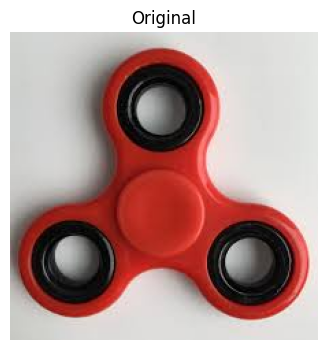

In [125]:
# Load the uploaded image
fidget = cv2.imread('../images/fidget.jpeg')
fidget = cv2.cvtColor(fidget, cv2.COLOR_BGR2RGB)

# Display the orignal image
plt.figure(figsize=(5, 4))
plt.imshow(fidget)
plt.title('Original')
plt.axis('off')
plt.show()

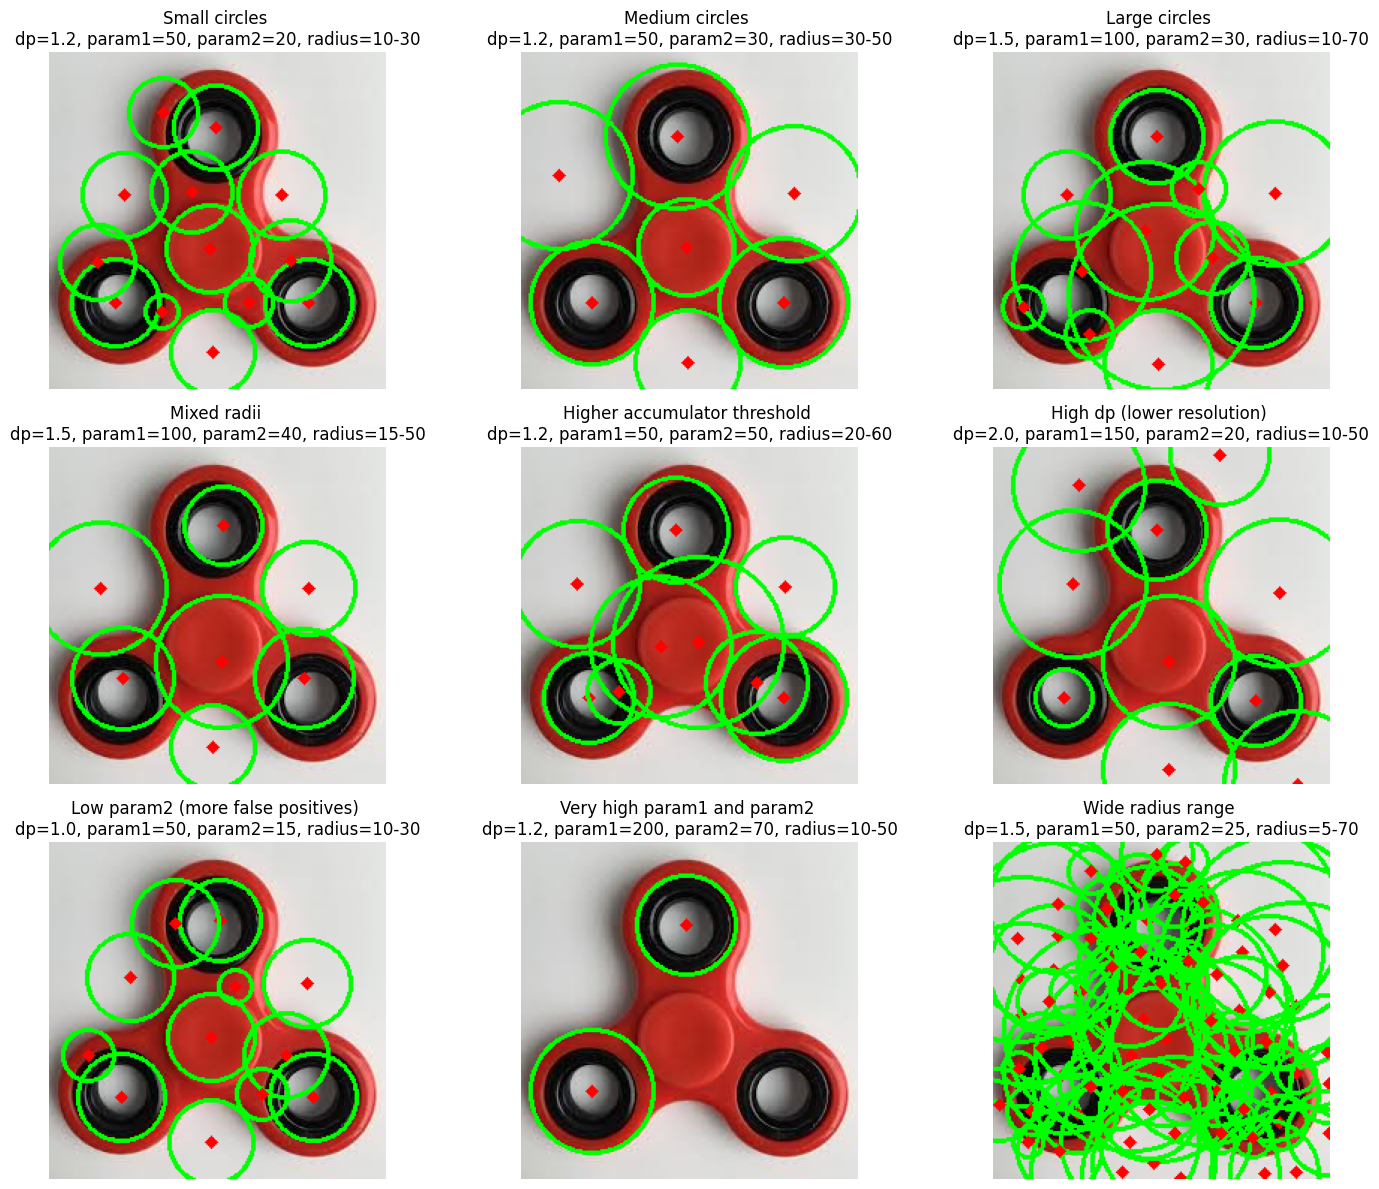

In [ ]:
params = [
    {"dp": 1.2, "minDist": 30, "param1": 50, "param2": 20, "minRadius": 10, "maxRadius": 30},  # Small circles
    {"dp": 1.2, "minDist": 30, "param1": 50, "param2": 30, "minRadius": 30, "maxRadius": 50},  # Medium circles
    {"dp": 1.5, "minDist": 40, "param1": 100, "param2": 30, "minRadius": 10, "maxRadius": 70},  # Large circles
    {"dp": 1.5, "minDist": 50, "param1": 100, "param2": 40, "minRadius": 15, "maxRadius": 50},  # Mixed radii
    {"dp": 1.2, "minDist": 20, "param1": 50, "param2": 50, "minRadius": 20, "maxRadius": 60},  # Higher accumulator threshold
    {"dp": 2.0, "minDist": 60, "param1": 150, "param2": 20, "minRadius": 10, "maxRadius": 50}, # High dp (lower resolution)
    {"dp": 1.0, "minDist": 30, "param1": 50, "param2": 15, "minRadius": 10, "maxRadius": 30},  # Low param2 (more false positives)
    {"dp": 1.2, "minDist": 40, "param1": 200, "param2": 70, "minRadius": 10, "maxRadius": 50}, # Very high param1 and param2
    {"dp": 1.5, "minDist": 20, "param1": 50, "param2": 25, "minRadius": 5, "maxRadius": 70},   # Wide radius range
]

plot_type = ['Small circles', 'Medium circles', 'Large circles', 'Mixed radii', 'Higher accumulator threshold', 'High dp (lower resolution)', 'Low param2 (more false positives)', 'Very high param1 and param2', 'Wide radius range']

# Display results for each set of parameters
plt.figure(figsize=(15, 12))
for i, param in enumerate(params):
    processed = circle_detection(
        fidget.copy(),
        cv2.HOUGH_GRADIENT,
        dp=param["dp"],
        minDist=param["minDist"],
        param1=param["param1"],
        param2=param["param2"],
        minRadius=param["minRadius"],
        maxRadius=param["maxRadius"],
    )
    
    plt.subplot(3, 3, i + 1)
    plt.imshow(processed)
    plt.title(f'{plot_type[i]} \ndp={param["dp"]}, param1={param["param1"]}, param2={param["param2"]}, radius={param["minRadius"]}-{param["maxRadius"]}')
    plt.axis('off')

plt.tight_layout()
plt.show()


The results of circle detection varied significantly with adjustments to radius ranges and accumulator thresholds. Smaller radius ranges (e.g., minRadius 10, maxRadius 30) detected either inner regions of circles or larger ones, while wider ranges (e.g., minRadius 10, maxRadius 70) captured both small and large circles effectively. Increasing the `param2` accumulator threshold reduced false positives but missed some weaker circles, while lower values allowed more circles to be detected, including noise. The `dp` parameter influenced resolution, with higher values (e.g., 2.0) reducing sensitivity, and moderate values (e.g., 1.2) offering the best results.


## Task 4: Harris Corner Detection

In [149]:
def harris_corner_detection(image, blockSize=2, ksize=3, k=0.01):
    # Convert the image to grayscale
    gray_image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    
    # Detect corners
    corners = cv2.cornerHarris(gray_image, blockSize, ksize, k)
    # blockSize : Neighborhood size considered for corner detection.
    # ksize : Aperture parameter of the Sobel derivative used.
    # k : Harris detector free parameter in the equation.
    
    # Dilate the corners to make them more visible
    corners = cv2.dilate(corners, None)
    
    # Threshold for an optimal value, it may vary depending on the image
    image[corners > 0.01 * corners.max()] = [0, 0, 255]
    
    return image

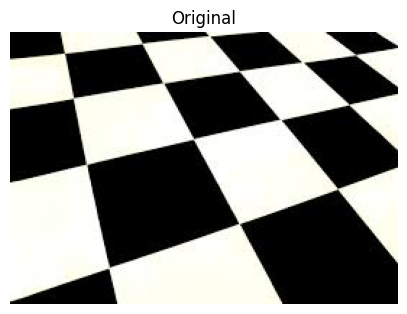

In [137]:
grid = cv2.imread('../images/grid.jpeg')
grid = cv2.cvtColor(grid, cv2.COLOR_BGR2RGB)

# Display the orignal image
plt.figure(figsize=(5, 4))
plt.imshow(grid)
plt.title('Original')
plt.axis('off')
plt.show()

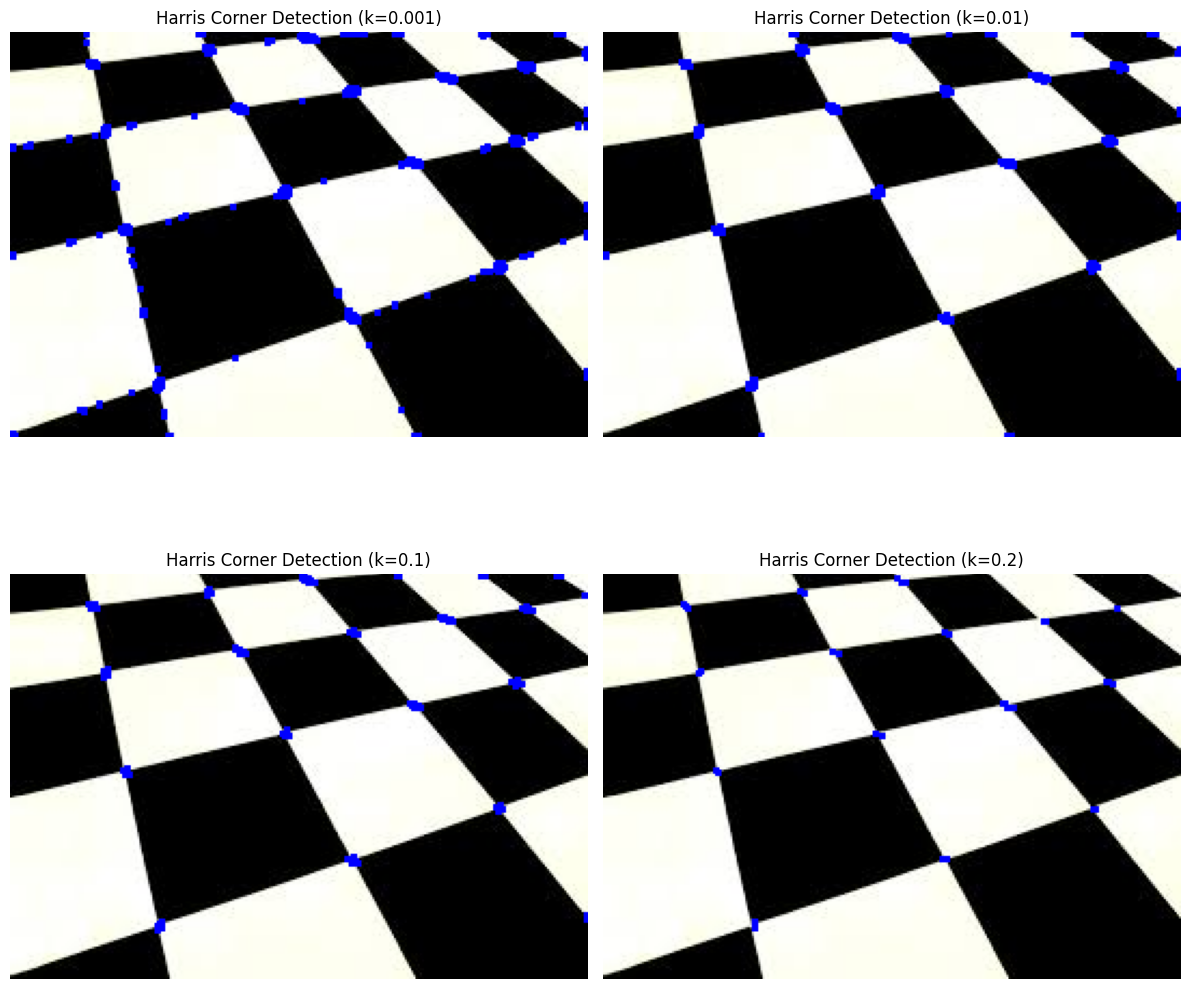

In [150]:
# Experiment with different parameters
k_values = [0.001, 0.01, 0.1, 0.2]

# Display results for each set of parameters
plt.figure(figsize=(12, 12))

for i, k in enumerate(k_values):
    processed = harris_corner_detection(grid.copy(), k=k)
    
    plt.subplot(2, 2, i + 1)
    plt.imshow(processed)
    plt.title(f'Harris Corner Detection (k={k})')
    plt.axis('off')

plt.tight_layout()
plt.show()


In Harris Corner Detection, the sensitivity parameter `k` controls the threshold for detecting corners. A lower value of `k` (such as 0.001) is more sensitive and detects a larger number of corners, including weaker features. A higher `k` (such as 0.2) results in fewer, but stronger, corner detections. As `k` increases, the algorithm becomes more selective, reducing the number of detected corners while focusing on those that are more distinct and prominent.

## Task 5: Short Theory

The Hough Transform differs in detecting lines and circles due to variations in parameter space and computational complexity.

For **line detection**, the transform uses a 2D parameter space defined by $\rho$ (distance from the origin) and $\theta$ (angle of the normal to the line). Each edge point votes in this space, and peaks correspond to detected lines. This approach is computationally efficient because the parameter space is small and simple.

For **circle detection**, the parameter space expands to 3D, including $x$ and $y$ (center coordinates) and $r$ (radius). Each edge point votes for multiple potential circles, significantly increasing computational complexity and memory usage. To improve efficiency, preprocessing steps like edge detection and limiting the radius range are often applied.

ITherefore, line detection is faster and less complex due to its simpler parameterization, while circle detection is slower and more resource-intensive because of its additional dimension.
